Lab Assignment 3

In [ ]:
#NAME: Sarthak Narang
#ROLLNO:102003627
#GROUP:3COE19

Q1
K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)
Load the dataset and Implement 5- fold cross validation for multiple linear regression (using least square error fit).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [171]:
dataset= pd.read_csv('USA_Housing.csv')
x=dataset.iloc[:10,:-1].values
y=dataset.iloc[:10,-1].values


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 878736.87 1058987.99]
 [  98374.38  798869.53]
 [ 127395.04  630943.49]]


In [172]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

print(scores)



[-265084.42 -196405.35 -264907.49 -201797.98 -151271.72]


In [ ]:
df = pd.read_csv("USA_Housing.csv")
df.columns
df_input = df.drop('Price',axis =1)
df_input.columns
df_output = df['Price']
df_output
df.head()
features_with_na = [feature for feature in df_input.columns if df_input[feature].isnull().sum()>1]

for feature in features_with_na:
  print(feature,np.round(df_input[feature].isnull().mean(),4),'% missing values')

discrete_feature=[feature for feature in df_input.columns if len(df_input[feature].unique())<200]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

df_input.columns
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
scaling.fit_transform(df_input[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']])


from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
df_input[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]=scaling.fit_transform(df_input[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']])



df_output=scaling.fit_transform(df[['Price']])
df_output = df_output.flatten()
df_output

df_input.head()




In [ ]:
import matplotlib.pyplot as plt
for feature in df_input.columns:
    data = df_input.copy()
    if 0 in data[feature].unique():
        pass
    else:
        # data[feature] = np.log(data[feature]) 
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()









In [ ]:

from sklearn import metrics
def get_description_model(model,x_train, x_test,y_train, y_test):
  reg=model.fit(x_train,y_train)
  y_predict = model.predict(x_test)
  r2_score=metrics.r2_score(y_test, y_predict)
  lse=metrics.mean_squared_error(y_predict,y_test)
  return model.score(x_test,y_test) ,y_predict,reg.coef_ ,r2_score,lse


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
folds = StratifiedKFold(n_splits=5)
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5)
from sklearn.linear_model import LinearRegression
df_output



df_input.head()

df_input.columns
df_input[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
kk=kfolds.split(df_input[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']],df_output)
print(kk)



df_output = pd.Series(df_output)
scores_model =[]
r2_scores =[]
for train_index,test_index in kfolds.split(df_input[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']],df_output):
  
   print("train_index",train_index)
   print("test_index",test_index)
   x_train, x_test = df_input.iloc[train_index], df_input.iloc[test_index]
   y_train, y_test = df_output.iloc[train_index], df_output.iloc[test_index]
   score,y_predict,beta_coeff,r2_score,lse=get_description_model(LinearRegression(),x_train, x_test,y_train, y_test)
   scores_model.append(score)
   r2_scores.append(r2_score)
  
   print("beta_coeff :",beta_coeff)
   print("r2_score",r2_score)
   print("lse",lse)
scores_model

Q2 Concept of Validation set for Multiple Linear Regression (Gradient Descent Optimization) Consider the same dataset of Q1, rather than dividing the dataset into five folds, divide the dataset into training set (56%), validation set (14%), and test set (30%). Consider four different values of learning rate i.e. {0.001,0.01,0.1,1}. Compute the values of regression coefficients for each value of learning rate after 1000 iterations. For each set of regression coefficients, compute R2_score for validation and test set and find the best value of regression coefficients.

In [173]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1)

In [ ]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.001

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))

x = np.array([1,2,3,4,5])
y = np.array([8,27,19,16,20])

gradient_descent(x,y)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_val)

In [ ]:
df = pd.read_csv('USA_Housing.csv')
df.head()
X = df.values[:, 0:2] 
y = df.values[:, 2] 

m = len(y)

print('Total no of training examples (m) = %s \n' %(m))

for i in range(5):
    print('x =', X[i, ], ', y =', y[i])




In [182]:
def feature_normalize(X):
  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis= 0, ddof = 1)
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

In [ ]:
X, mu, sigma = feature_normalize(X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', X[:5])

In [194]:
mu_testing = np.mean(X, axis = 0)
sigma_testing = np.std(X, axis = 0, ddof = 1)

In [ ]:
X = np.hstack((np.ones((m,1)), X))
X[:5]

In [186]:
def compute_cost(X, y, theta):
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1/(2 * m) * errors.T.dot(errors)

  return J

In [187]:
def gradient_descent(X, y, theta, alpha, iterations):
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    
    errors = np.subtract(predictions, y)
    
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [188]:
theta = np.zeros(3)
iterations = 400;
alpha = 0.15;

In [ ]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Text(0.5, 1.0, 'Convergence of gradient descent')

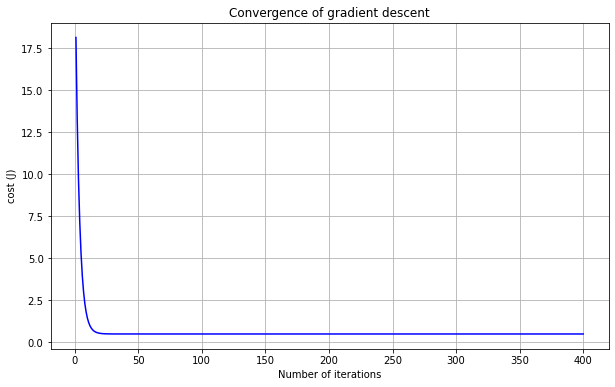

In [191]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

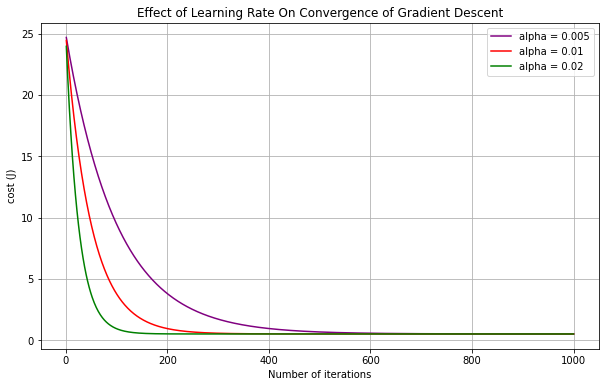

In [192]:
iterations = 1000;
theta = np.zeros(3)

alpha = 0.005;
theta_1, cost_history_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.01;
theta_2, cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.02;
theta_3, cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')


plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()


Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

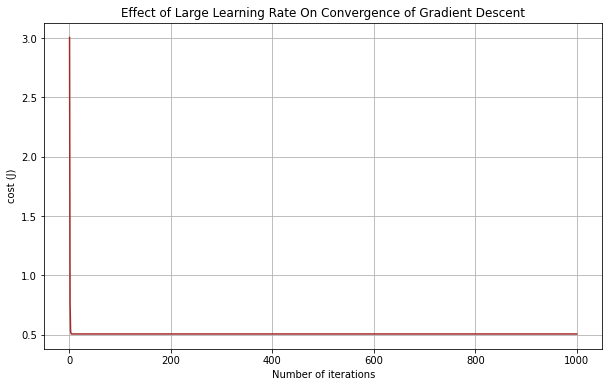

In [193]:
iterations = 1000;
theta = np.zeros(3)

alpha = 1.32;
theta_6, cost_history_6 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

Q3 Pre-processing and Multiple Linear Regression

In [215]:
import pandas as pd
df[["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"] ]= pd.read_csv("imports-85.data",sep=",")

In [ ]:
df.head()

In [ ]:
c=['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495']
df = df.drop(c,axis =1)

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
import numpy as np
df =df.replace("?",np.nan)
df.head()

In [222]:
df['num_doors'] = df['num_doors'].fillna("Zero")
df['normalized_losses'] = df['normalized_losses'].fillna(0)

In [ ]:
pip install word2number

In [ ]:
from word2number import w2n
df.num_doors = df.num_doors.apply(w2n.word_to_num)
df.head()

In [ ]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_na

In [ ]:
for feature in features_with_na:
  if(feature!='price'):
    df[feature] = df[feature].fillna(0)
    df[feature] = df[feature].replace(0,df[feature].median())

In [ ]:
df.head()

In [ ]:
df = df.dropna(axis=0)
df.num_cylinders = df.num_cylinders.apply(w2n.word_to_num)
dummies = pd.get_dummies(df[['body_style','drive_wheels']])
dummies

In [ ]:
df = df.drop(['body_style','drive_wheels'],axis = 1)
df.head()

In [ ]:
df = pd.concat([df,dummies],axis = 'columns')
df = df.drop(['body_style_wagon','drive_wheels_rwd'],axis = 1)
df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['make']=le.fit_transform(df['make'])
df['fuel_type']=le.fit_transform(df['fuel_type'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['engine_location']=le.fit_transform(df['engine_location'])
df.head()

In [ ]:
for i in df.index:
  if(df['fuel_system'][i]=='pfi'):
    df['fuel_system'][i]=1;
  else:
    df['fuel_system'][i]=0;

In [ ]:
for i in df.index:
  if(df['engine_type'][i]=='ohc'):
    df['engine_type'][i]=1;
  else:
    df['engine_type'][i]=0;

In [ ]:
df['fuel_system']

In [ ]:
df['engine_type']

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
v=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'body_style_convertible', 'body_style_hardtop', 'body_style_hatchback',
       'body_style_sedan', 'drive_wheels_4wd', 'drive_wheels_fwd']
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
df[v]=scaling.fit_transform(df[v])

In [ ]:
df.head()

In [235]:
df_output =df['price'] 
type(df_output)

pandas.core.series.Series

In [ ]:
df_input = df[input]
df_input.columns

In [ ]:
df_input.columns

In [ ]:
df_output.head()

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_input,df_output,test_size = 0.3,random_state =10)
model.fit(x_train,y_train)

In [ ]:
model.score(x_test,y_test)

In [ ]:
df_input.shape

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(df_input)
X_pca.shape

In [ ]:
pca.explained_variance_ratio_

In [ ]:
pca.n_components_

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, df_output, test_size=0.3, random_state=42)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)